In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## A1) Histogram Equalization

In [2]:
image = cv2.imread(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\people.png")

In [3]:
print(np.unique(image.flatten()))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [4]:
def create_pdf(im_in):
    image_data = im_in.flatten()
    bins = np.arange(0,256,1)

    hist = {bin: 0 for bin in bins}
    
    for i in image_data:
        for bin in bins:
            if i <= bin:
                hist[bin] +=1
                break

    hist_arr = np.array(list(hist.values()))
    bins_arr = np.array(list(hist.keys()))


    plt.plot(bins_arr, hist_arr, color = 'b', label = 'PDF', lw = 2)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('PDF')   
    plt.show()

    pdf = hist_arr / sum(hist_arr)

    return pdf

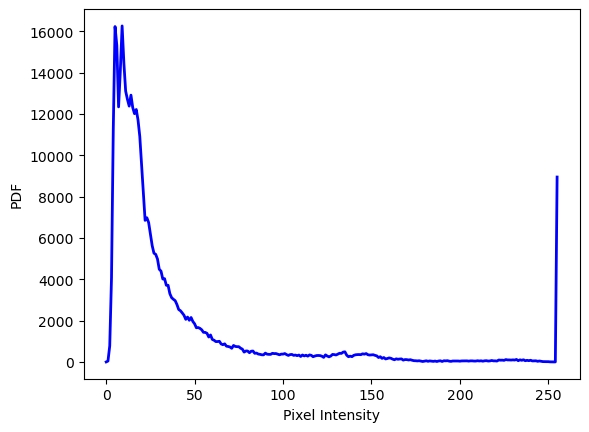

In [5]:
pdf_ori = create_pdf(image)

In [6]:
def create_cdf(pdf_val):
    cdf = [sum(pdf_val[:i+1]) for i in range(len(pdf_val))]

    # tot = cdf[-1]
    # cdf_normalized = [value / tot for value in cdf]
    
    plt.plot(cdf, color = "r")
    plt.xlim([0,256])
    # plt.legend(loc = 'upper right')
    plt.xlabel("Pixel Intensity")
    plt.ylabel("CDF")
    plt.show()
    return cdf

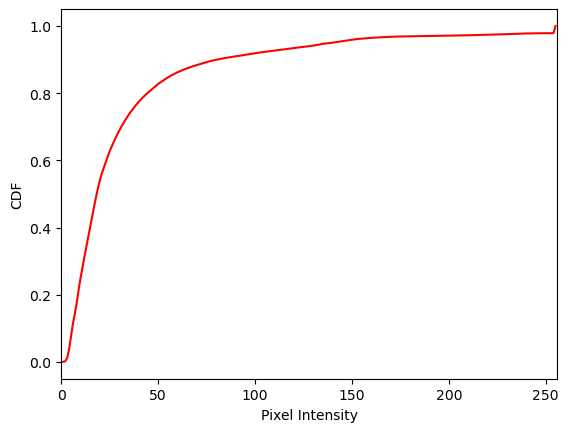

[0.0,
 0.00010158472165786265,
 0.001980902072328322,
 0.01182736402159401,
 0.039052069425901205,
 0.0783290764497591,
 0.11542201195797296,
 0.14528792012538458,
 0.17942764265397343,
 0.21877721019330124,
 0.2537876589075289,
 0.28550386021942303,
 0.31626226272711444,
 0.3462224995646369,
 0.37746705752597665,
 0.4072604051779184,
 0.4363354037267081,
 0.4658965577291461,
 0.4942241829685958,
 0.5206216984965462,
 0.543681430312881,
 0.5632727694897545,
 0.579852847274627,
 0.5967376792244732,
 0.6130637952052012,
 0.6280620537528299,
 0.6416889185580774,
 0.6544232890230453,
 0.6670197945086203,
 0.679072096128171,
 0.6899271492424683,
 0.700557264758809,
 0.7102658617286819,
 0.7200252510593836,
 0.7290009868230105,
 0.7379767225866374,
 0.7459728913914205,
 0.7534974168456494,
 0.7608332849596565,
 0.7680095199396298,
 0.7747358797236897,
 0.7808744993324435,
 0.7868679979102574,
 0.7926075346839266,
 0.7980713414988102,
 0.8030562489115924,
 0.8083096302316133,
 0.8131856968711

In [7]:
create_cdf(pdf_ori)

In [8]:
def histogram_equalization(im_in):
    pdf = create_pdf(im_in)
    cdf = create_cdf(pdf)

    eq_im = np.zeros_like(im_in)
    for i in range(256):
        eq_im[im_in == i] = round(cdf[i] * 255)
    
    return eq_im

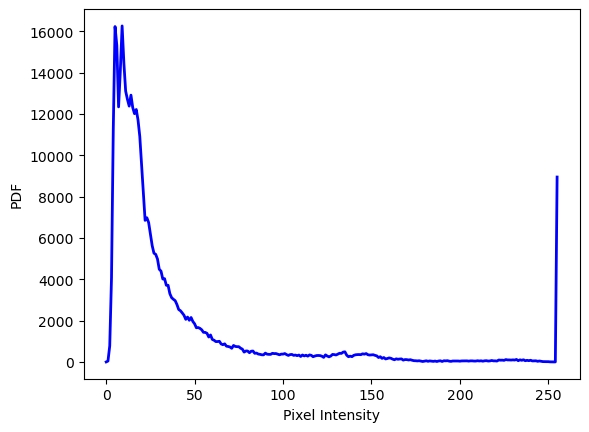

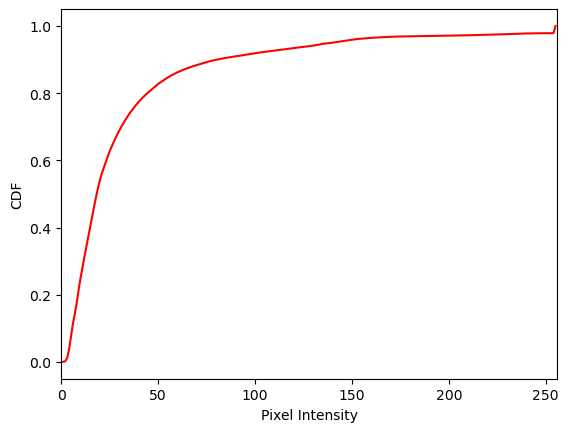

-------------------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'After Histogram Equalization')

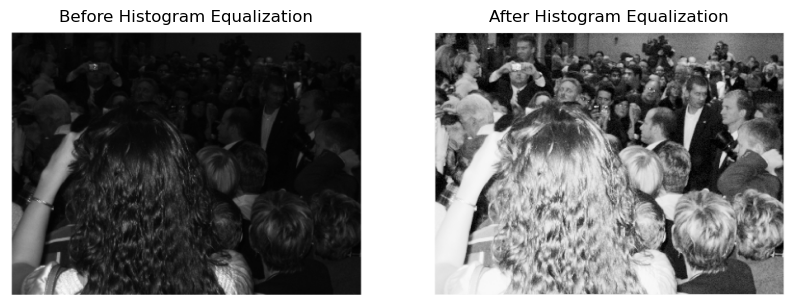

In [9]:
eq_img = histogram_equalization(image)

print("-------------------------------------------------------------------------------------------------------------")
# plt.imshow(equalized_image.astype(np.uint8))

fig = plt.figure(figsize = (10,7))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis("off")
plt.title("Before Histogram Equalization")

fig.add_subplot(1,2,2)
plt.imshow(eq_img.astype(np.uint8))
plt.axis("off")
plt.title("After Histogram Equalization")

Text(0.5, 1.0, 'After Histogram Equalization, Once')

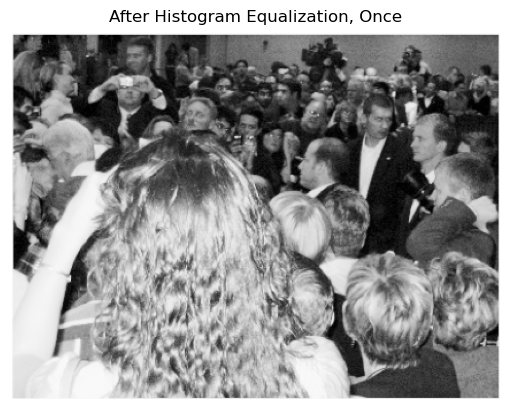

In [10]:
plt.imshow(eq_img.astype(np.uint8))
plt.axis("off")
plt.title("After Histogram Equalization, Once")

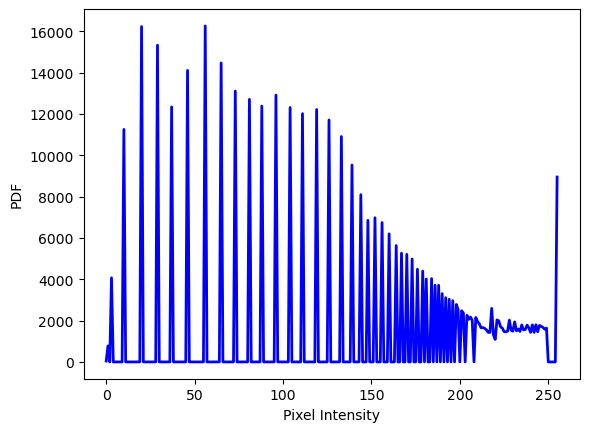

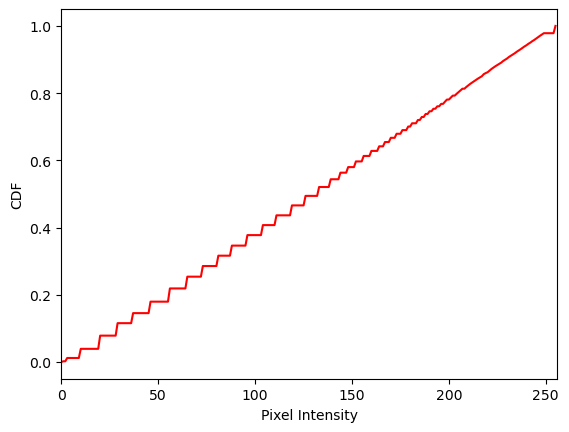

Text(0.5, 1.0, 'After Histogram Equalization, Twice')

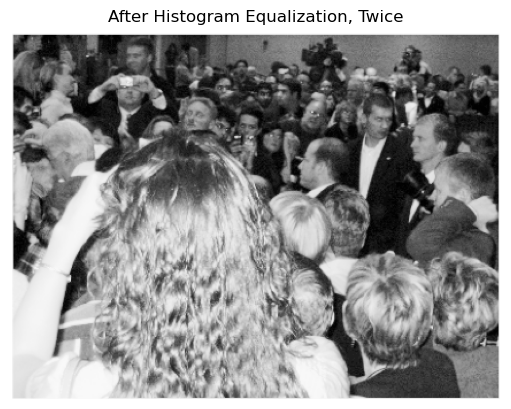

In [11]:
eq_img_2 = histogram_equalization(eq_img)
plt.imshow(eq_img_2.astype(np.uint8))
plt.axis("off")
plt.title("After Histogram Equalization, Twice")

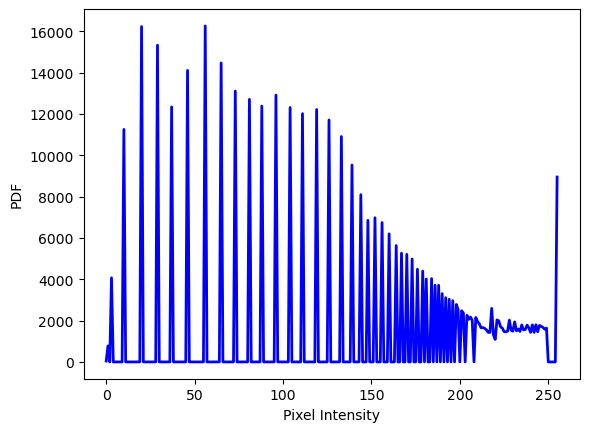

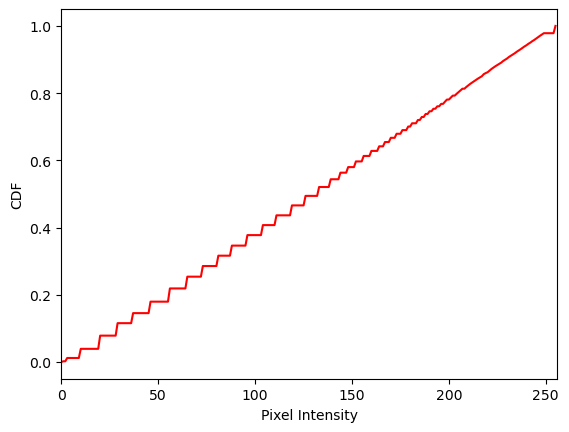

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [235, 235, 235],
        ...,
        [235, 235, 235],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [234, 234, 234],
        ...,
        [235, 235, 235],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [255, 255, 255],
        [255, 255, 255]]

In [12]:
histogram_equalization(eq_img_2)

### ON different image


In [13]:
image2 = cv2.imread(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\greyscale.png")

(-0.5, 255.5, 255.5, -0.5)

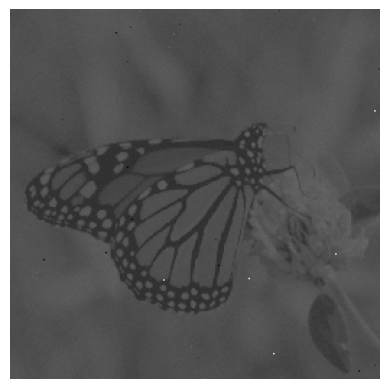

In [14]:
plt.imshow(image2)
plt.axis("off")

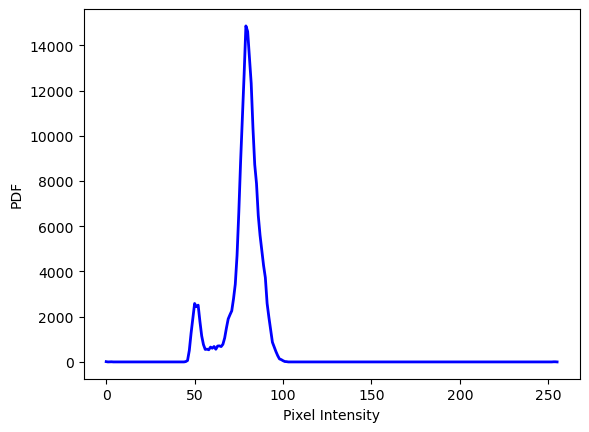

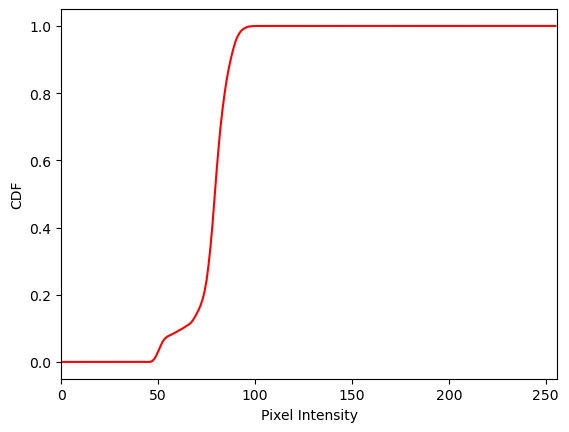

Text(0.5, 1.0, 'New Histogram Equalized Image')

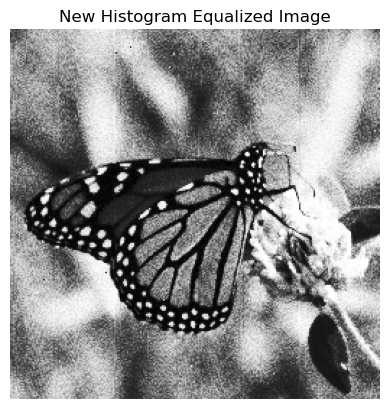

In [15]:
eq_img2_new = histogram_equalization(image2)
plt.imshow(eq_img2_new.astype(np.uint8))
plt.axis("off")
plt.title("New Histogram Equalized Image")

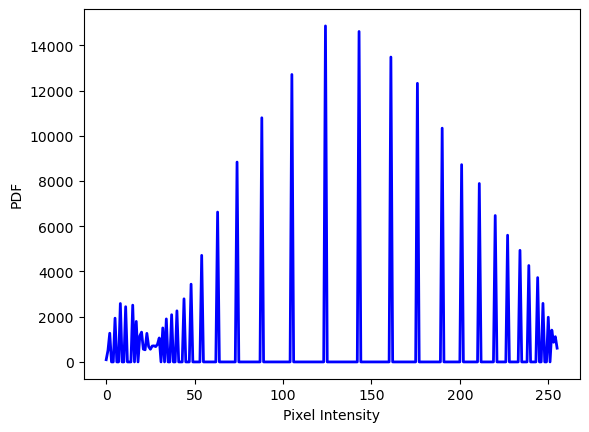

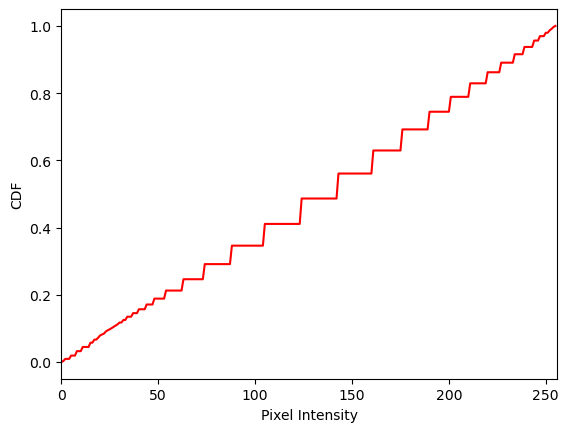

array([[[105, 105, 105],
        [ 74,  74,  74],
        [ 88,  88,  88],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 74,  74,  74]],

       [[143, 143, 143],
        [ 74,  74,  74],
        [ 88,  88,  88],
        ...,
        [ 54,  54,  54],
        [124, 124, 124],
        [ 74,  74,  74]],

       [[ 74,  74,  74],
        [ 88,  88,  88],
        [105, 105, 105],
        ...,
        [124, 124, 124],
        [ 88,  88,  88],
        [161, 161, 161]],

       ...,

       [[161, 161, 161],
        [220, 220, 220],
        [201, 201, 201],
        ...,
        [176, 176, 176],
        [105, 105, 105],
        [105, 105, 105]],

       [[176, 176, 176],
        [201, 201, 201],
        [201, 201, 201],
        ...,
        [176, 176, 176],
        [ 74,  74,  74],
        [ 88,  88,  88]],

       [[201, 201, 201],
        [201, 201, 201],
        [201, 201, 201],
        ...,
        [161, 161, 161],
        [124, 124, 124],
        [124, 124, 124]]

In [16]:
histogram_equalization(eq_img2_new)

### Car image with less contrast

In [17]:
image_car = cv2.imread(r"D:\Final Lightroom edited\DSC_0852-2.jpg")

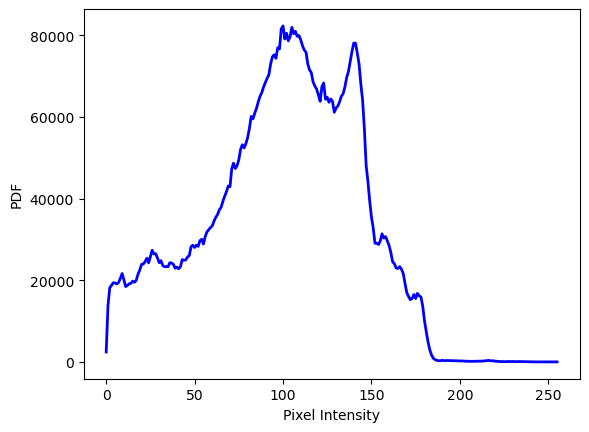

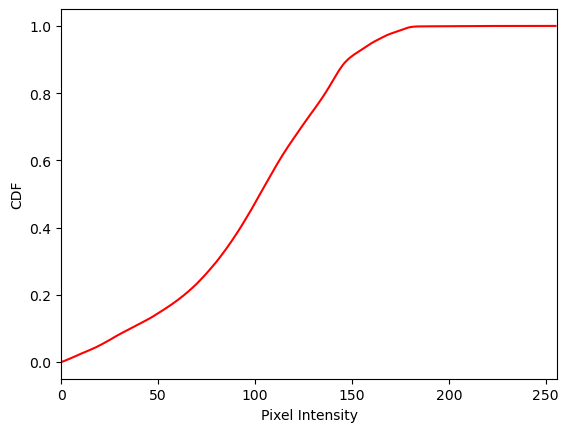

Text(0.5, 1.0, 'After Histogram Equalization')

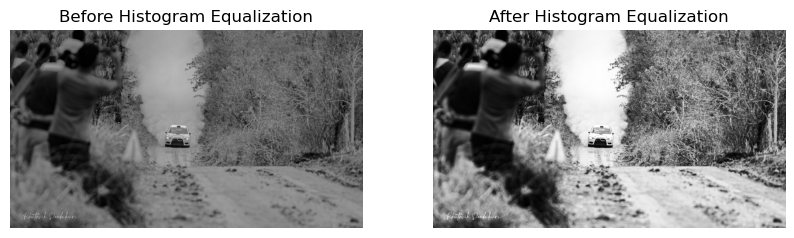

In [18]:
car_img_hist = histogram_equalization(image_car)

fig = plt.figure(figsize = (10,7))
fig.add_subplot(1,2,1)
plt.imshow(image_car)
plt.axis("off")
plt.title("Before Histogram Equalization")

fig.add_subplot(1,2,2)
plt.imshow(car_img_hist.astype(np.uint8))
plt.axis("off")
plt.title("After Histogram Equalization")

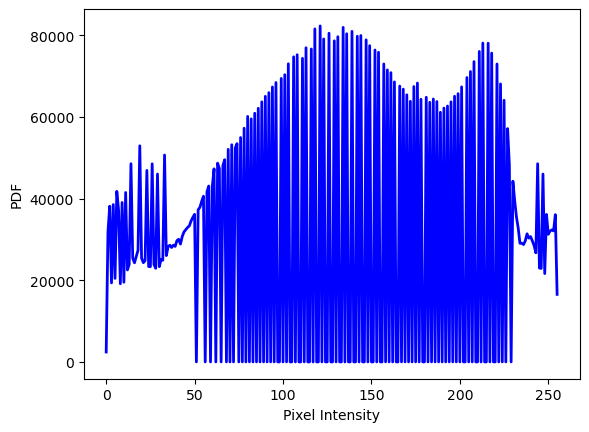

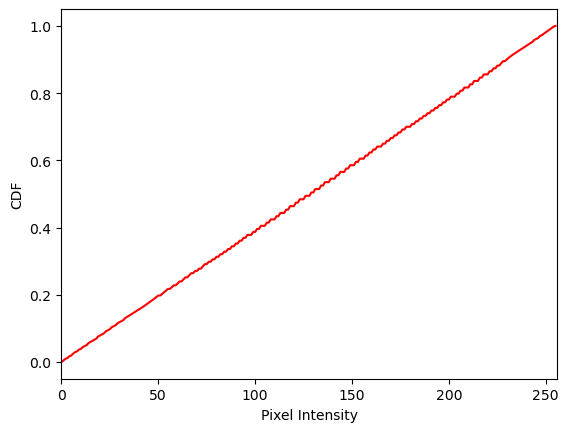

In [19]:
car_img_pdf = histogram_equalization(car_img_hist)

In [20]:
cv2.imwrite('new_update.jpg', car_img_hist)

True

(-0.5, 2159.5, 1214.5, -0.5)

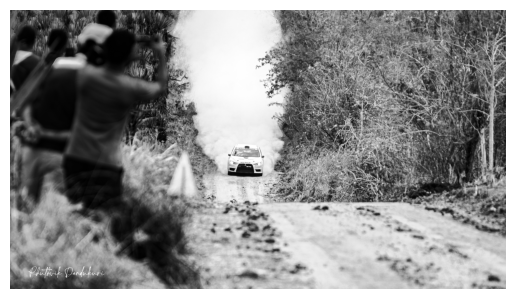

In [21]:
plt.imshow(car_img_hist.astype(np.uint8))
plt.axis("off")

## A2) Otsu Thresholding

In [22]:
image = cv2.imread(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\b2_a.png")

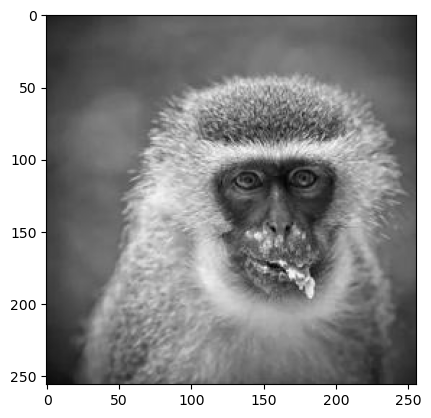

In [23]:
plt.imshow(image)

In [24]:
def otsu_threshold(im_in):
    image_data = im_in.flatten()
    bins = np.arange(0,256,1)

    hist = {bin: 0 for bin in bins}
    
    for i in image_data:
        for bin in bins:
            if i <= bin:
                hist[bin] +=1
                break

    hist_arr = np.array(list(hist.values()))
    bins_arr = np.array(list(hist.keys()))

    pdf = hist_arr / sum(hist_arr)

    cdf = [sum(pdf[:i+1]) for i in range(len(pdf))]

    cum_int = np.cumsum(np.arange(256) * pdf)
    mu = {}

    total_mean = cum_int[-1]
    max_var, best_thresh = 0, 0
    for thresh in range(1,256):
        fore = cdf[thresh]
        back = 1 - fore

        if fore == 0 or back == 0:
            continue
        mean_fore = cum_int[thresh] / fore
        mean_back = (total_mean - cum_int[thresh]) / back

        mu_fb = fore * back * (mean_back - mean_fore)**2
        mu[thresh] = mu_fb
        if mu_fb > max_var:
            max_var = mu_fb
            best_thresh = thresh

    thresh_image = np.zeros_like(im_in)
    thresh_image[im_in > best_thresh] = 255

    return thresh_image, best_thresh, mu




threshold chosen is 131 and the inter-class variance is 1448.0136082304261


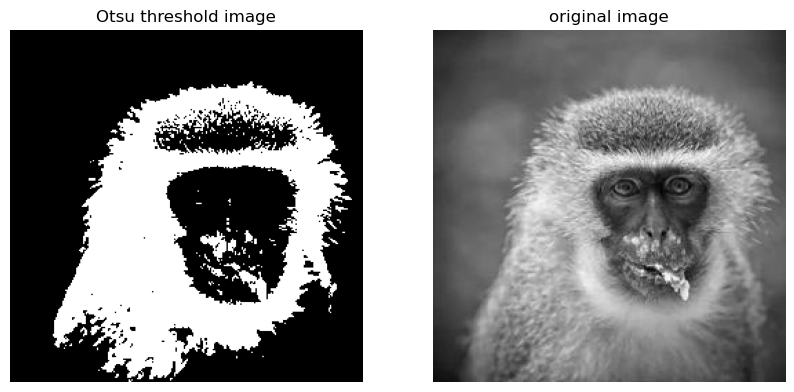

In [25]:
image_otsu, selected_threshold,mu = otsu_threshold(image)

thresholds = np.arange(254)
fig = plt.figure(figsize = (10,5))
fig.add_subplot(1,2,1)
plt.imshow(image_otsu)
plt.axis("off")
plt.title("Otsu threshold image")

fig.add_subplot(1,2,2)
plt.imshow(image)
plt.axis("off")
plt.title("original image")



print("threshold chosen is", selected_threshold, "and the inter-class variance is", mu.get(selected_threshold))

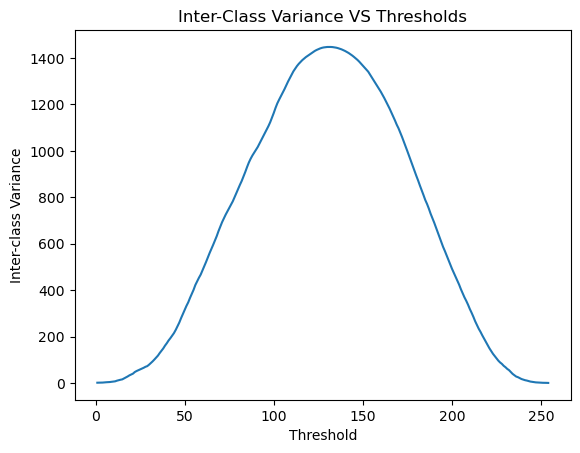

In [26]:
plt.plot(list(mu.keys()), list(mu.values()), label = "inter-class variance")
plt.xlabel('Threshold')
plt.ylabel("Inter-class Variance")
plt.title("Inter-Class Variance VS Thresholds")
plt.show()

(-0.5, 219.5, 219.5, -0.5)

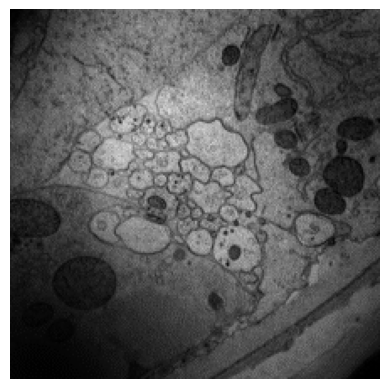

In [27]:
image_2 = cv2.imread(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\b2_b.png")
plt.imshow(image_2)
plt.axis("off")

threshold chosen is 85 and the inter-class variance is 1366.6478182943322


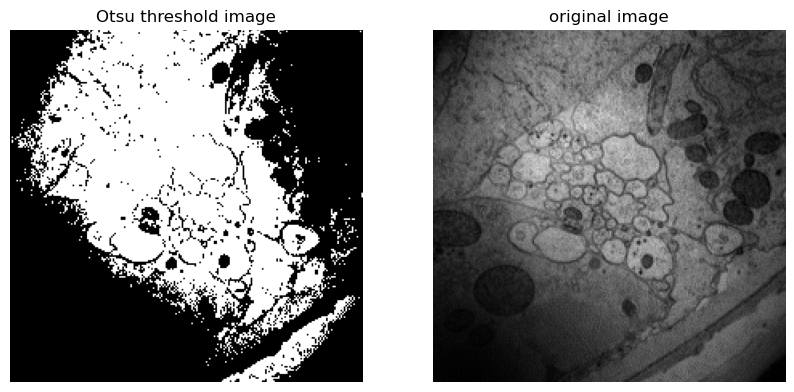

In [28]:
image_otsu_2, selected_threshold_2,mu2 = otsu_threshold(image_2)

fig2 = plt.figure(figsize = (10,7))
fig2.add_subplot(1,2,1)
plt.imshow(image_otsu_2)
plt.axis("off")
plt.title("Otsu threshold image")

fig2.add_subplot(1,2,2)
plt.imshow(image_2)
plt.axis("off")
plt.title("original image")

print("threshold chosen is", selected_threshold_2, "and the inter-class variance is", mu2.get(selected_threshold_2))

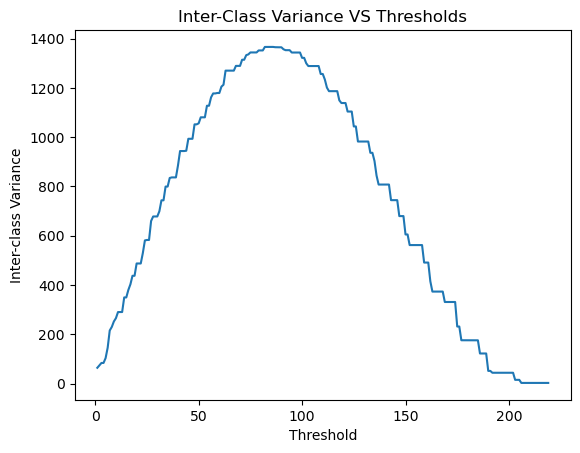

In [29]:
plt.plot(list(mu2.keys()), list(mu2.values()), label = "inter-class variance")
plt.xlabel('Threshold')
plt.ylabel("Inter-class Variance")
plt.title("Inter-Class Variance VS Thresholds")
plt.show()

(-0.5, 219.5, 219.5, -0.5)

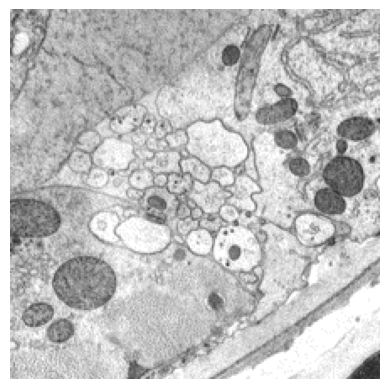

In [30]:
image_3 = cv2.imread(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\b2_c.png")
plt.imshow(image_3)
plt.axis("off")

threshold chosen is 170 and the inter-class variance is 1079.7087141560721


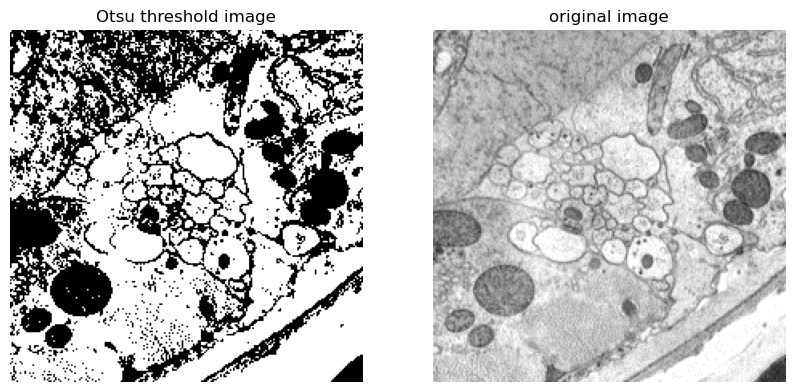

In [31]:
image_otsu_3, selected_threshold_3, mu3 = otsu_threshold(image_3)

fig3 = plt.figure(figsize = (10,7))
fig3.add_subplot(1,2,1)
plt.imshow(image_otsu_3)
plt.axis("off")
plt.title("Otsu threshold image")

fig3.add_subplot(1,2,2)
plt.imshow(image_3)
plt.axis("off")
plt.title("original image")

print("threshold chosen is", selected_threshold_3, "and the inter-class variance is", mu3.get(selected_threshold_3))

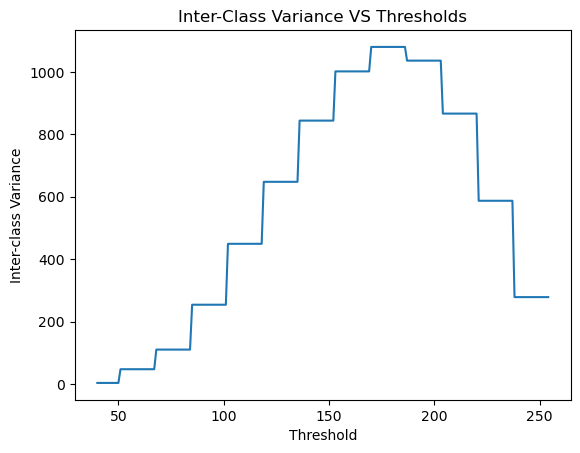

In [32]:
plt.plot(list(mu3.keys()), list(mu3.values()), label = "inter-class variance")
plt.xlabel('Threshold')
plt.ylabel("Inter-class Variance")
plt.title("Inter-Class Variance VS Thresholds")
plt.show()

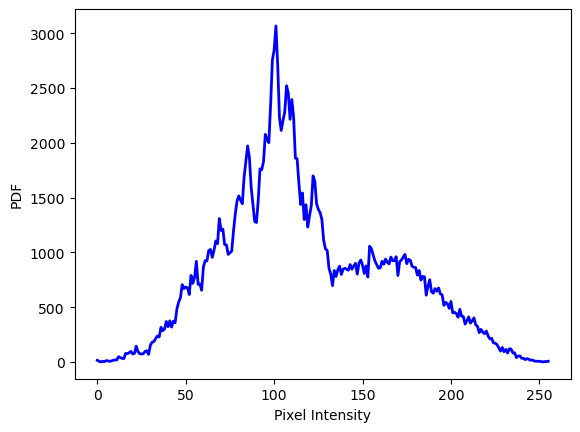

array([7.62939453e-05, 3.05175781e-05, 0.00000000e+00, 3.05175781e-05,
       1.52587891e-05, 6.10351562e-05, 4.57763672e-05, 3.05175781e-05,
       4.57763672e-05, 7.62939453e-05, 9.15527344e-05, 9.15527344e-05,
       2.44140625e-04, 1.98364258e-04, 1.67846680e-04, 1.52587891e-04,
       3.96728516e-04, 3.81469727e-04, 4.27246094e-04, 4.88281250e-04,
       3.66210938e-04, 3.96728516e-04, 7.32421875e-04, 4.73022461e-04,
       3.81469727e-04, 3.66210938e-04, 3.81469727e-04, 4.88281250e-04,
       5.18798828e-04, 3.50952148e-04, 7.78198242e-04, 9.15527344e-04,
       9.46044922e-04, 1.08337402e-03, 1.20544434e-03, 1.15966797e-03,
       1.60217285e-03, 1.44958496e-03, 1.52587891e-03, 1.87683105e-03,
       1.63269043e-03, 1.90734863e-03, 1.61743164e-03, 1.89208984e-03,
       1.81579590e-03, 2.45666504e-03, 2.77709961e-03, 2.97546387e-03,
       3.58581543e-03, 3.40270996e-03, 3.47900391e-03, 3.43322754e-03,
       3.12805176e-03, 4.01306152e-03, 3.64685059e-03, 3.92150879e-03,
      

In [33]:
create_pdf(image)

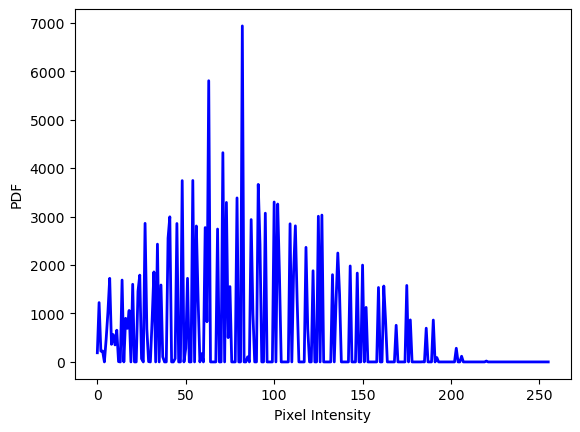

array([1.30165289e-03, 8.42975207e-03, 1.52892562e-03, 1.54958678e-03,
       0.00000000e+00, 3.26446281e-03, 7.10743802e-03, 1.18801653e-02,
       2.50000000e-03, 3.88429752e-03, 2.41735537e-03, 4.50413223e-03,
       4.13223140e-05, 0.00000000e+00, 1.16322314e-02, 0.00000000e+00,
       6.19834711e-03, 4.77272727e-03, 7.31404959e-03, 0.00000000e+00,
       1.10330579e-02, 0.00000000e+00, 0.00000000e+00, 1.00413223e-02,
       1.23347107e-02, 4.54545455e-04, 0.00000000e+00, 1.96900826e-02,
       4.69008264e-03, 4.13223140e-05, 0.00000000e+00, 6.01239669e-03,
       1.27892562e-02, 0.00000000e+00, 1.67355372e-02, 0.00000000e+00,
       1.09297521e-02, 7.23140496e-04, 0.00000000e+00, 0.00000000e+00,
       1.75826446e-02, 2.06198347e-02, 0.00000000e+00, 0.00000000e+00,
       4.75206612e-04, 1.96694215e-02, 0.00000000e+00, 0.00000000e+00,
       2.57644628e-02, 0.00000000e+00, 1.94214876e-03, 1.18801653e-02,
       0.00000000e+00, 0.00000000e+00, 2.57851240e-02, 0.00000000e+00,
      

In [34]:
create_pdf(image_2)

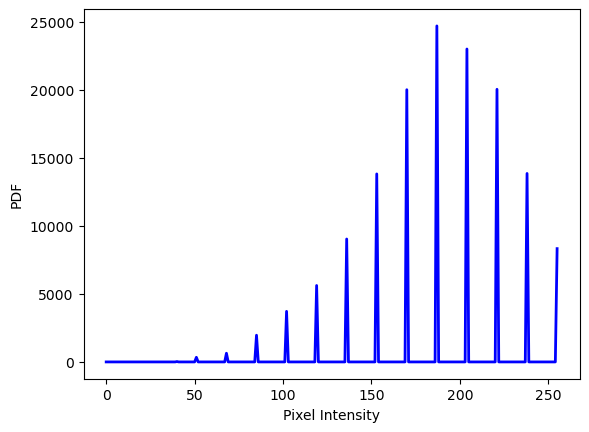

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00018595, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00235537, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00440083, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
create_pdf(image_3)

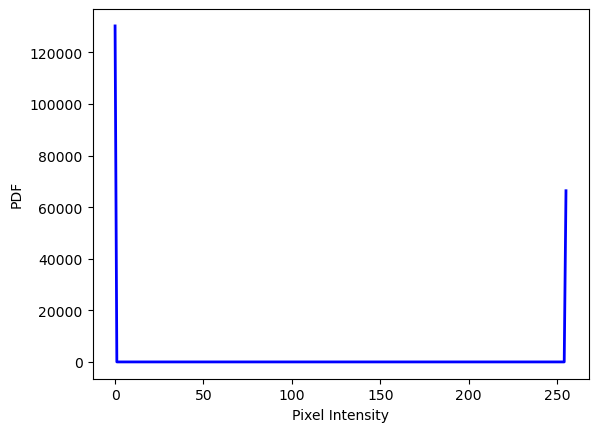

array([0.66247559, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:
create_pdf(image_otsu)

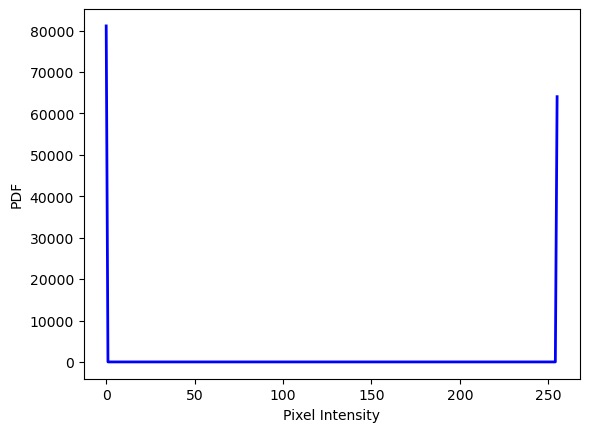

array([0.55884298, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
create_pdf(image_otsu_2)

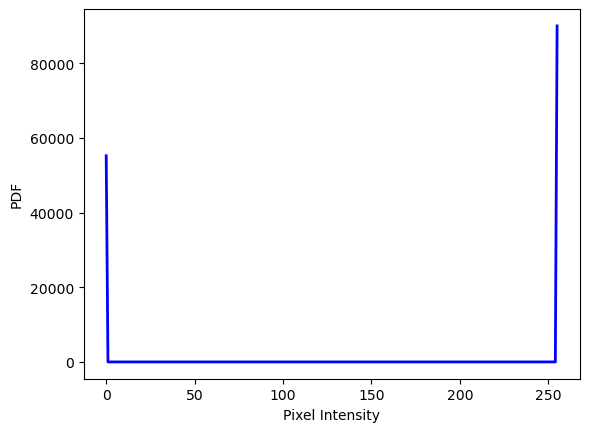

array([0.38024793, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [38]:
create_pdf(image_otsu_3)

### Otsu Thresholding using cv2

In [63]:
#b2_a.png otsu using cv2
image_1 = cv2.imread(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\b2_a.png")
image_1_g = image_1[:,:,0]

Text(0.5, 1.0, 'Otsu Thresholding (Threshold: 131.00)')

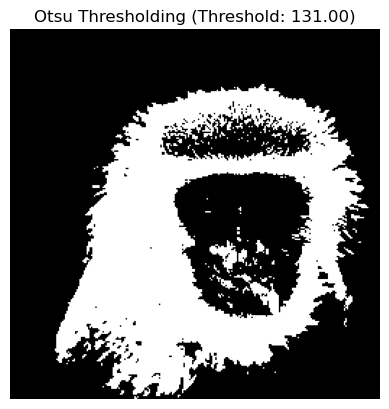

In [67]:
ret, thresh1 = cv2.threshold(image_1_g, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh1, cmap = "gray")
plt.axis("off")
plt.title(f'Otsu Thresholding (Threshold: {ret:.2f})')

In [68]:
#b2_b.png using otsu threshold with cv2
image_2 = cv2.imread(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\b2_b.png")
image_2_g = image_2[:,:,0]

Text(0.5, 1.0, 'Otsu Thresholding (Threshold: 85.00)')

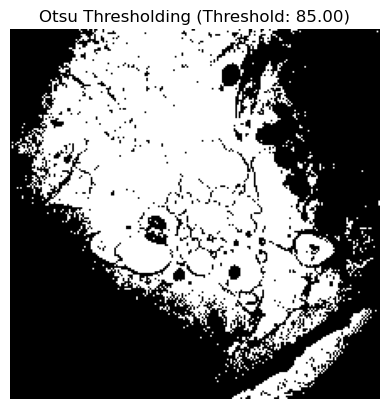

In [69]:
ret, thresh2 = cv2.threshold(image_2_g, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh2, cmap = "gray")
plt.axis("off")
plt.title(f'Otsu Thresholding (Threshold: {ret:.2f})')

In [70]:
#b2_c.png using otsu threshold with cv2
image_3 = cv2.imread(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\b2_c.png")
image_3_g = image_3[:,:,0]

Text(0.5, 1.0, 'Otsu Thresholding (Threshold: 170.00)')

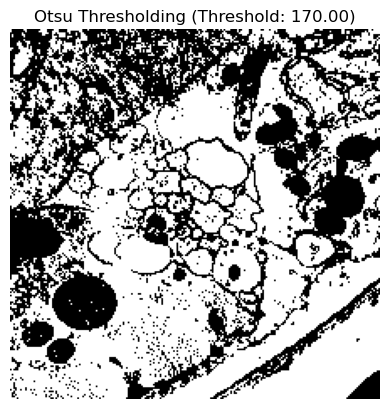

In [71]:
ret, thresh3 = cv2.threshold(image_3_g, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh3, cmap = "gray")
plt.axis("off")
plt.title(f'Otsu Thresholding (Threshold: {ret:.2f})')

## Manual Thresholding

In [39]:
def manual_thresh(im_in, thresh):
   thres_man_img = (im_in > thresh)*255
   return thres_man_img.astype(np.uint8)


Text(0.5, 1.0, 'Manually thresholded Image at 111')

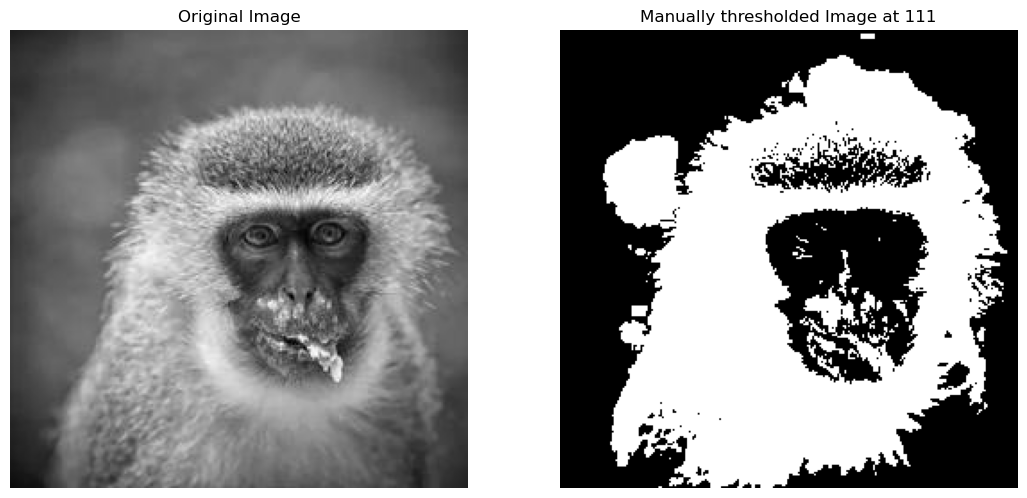

In [40]:
image_man_1 = manual_thresh(image, 111)

fig = plt.figure(figsize = (13,10))

fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(1,2,2)
plt.imshow(image_man_1)
plt.axis("off")
plt.title("Manually thresholded Image at 111")

Text(0.5, 1.0, 'Manually thresholded Image at 28')

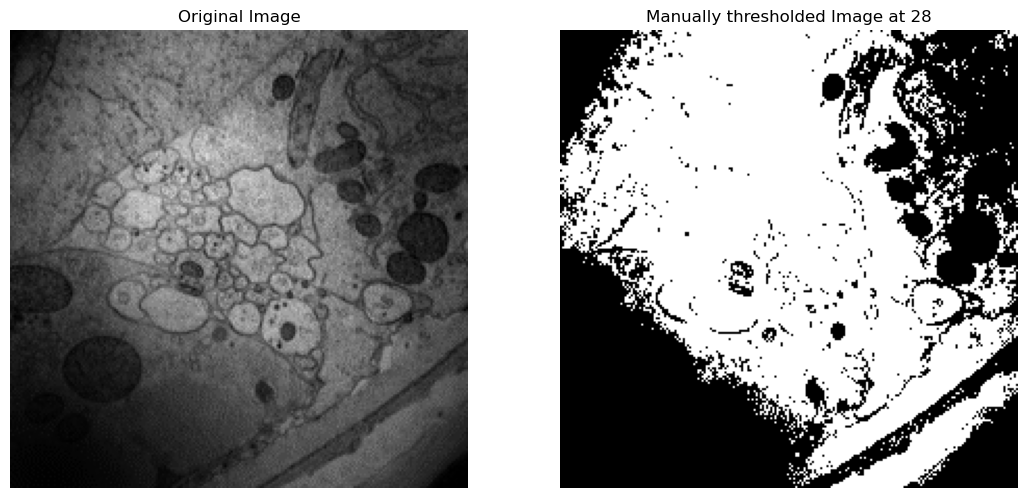

In [41]:
image_man_2 = manual_thresh(image_2, 70)

fig = plt.figure(figsize = (13,10))

fig.add_subplot(1,2,1)
plt.imshow(image_2)
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(1,2,2)
plt.imshow(image_man_2)
plt.axis("off")
plt.title("Manually thresholded Image at 28")


Text(0.5, 1.0, 'Manually thresholded Image at 222')

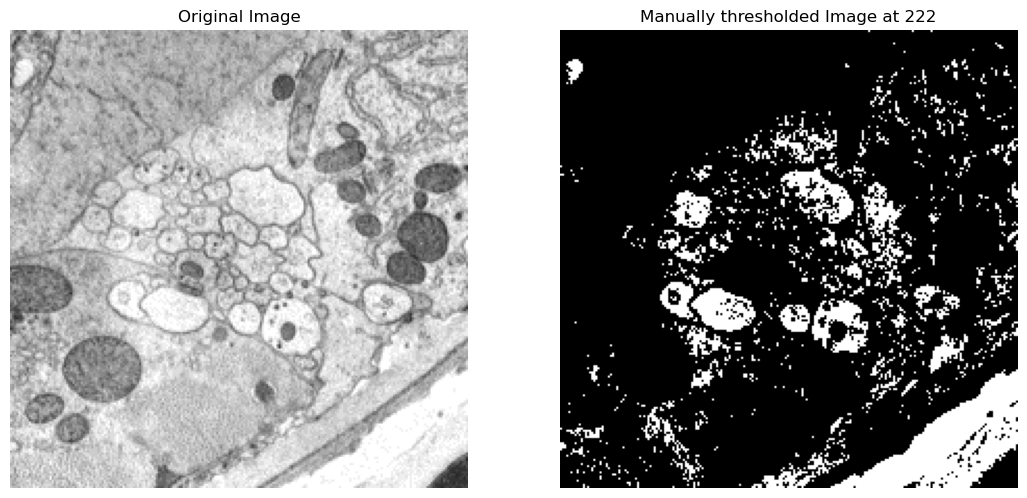

In [42]:
image_man_3 = manual_thresh(image_3, 222)

fig = plt.figure(figsize = (13,10))

fig.add_subplot(1,2,1)
plt.imshow(image_3)
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(1,2,2)
plt.imshow(image_man_3)
plt.axis("off")
plt.title("Manually thresholded Image at 222")

### Histograms of Manually Thresholded Images

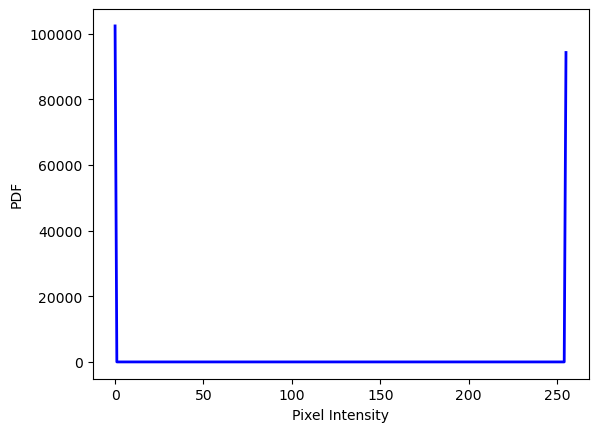

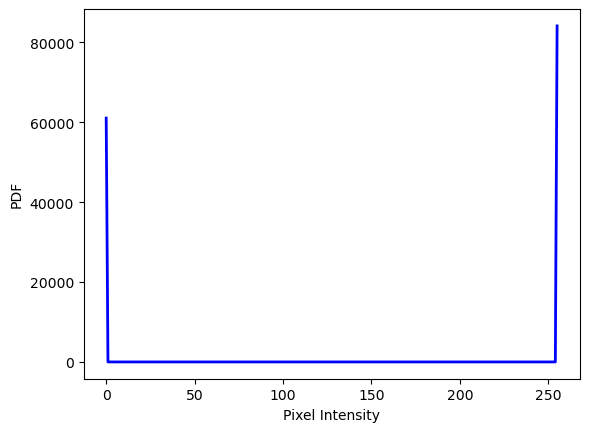

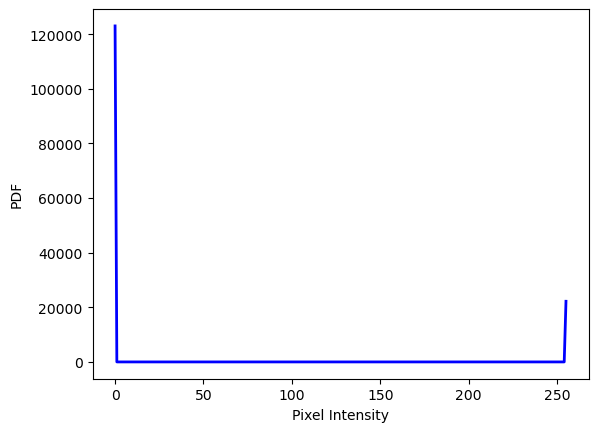

In [43]:
image_hist_man_1 = create_pdf(image_man_1)
image_hist_man_2 = create_pdf(image_man_2)
image_hist_man_3 = create_pdf(image_man_3)

## A3) Creative Part

In [44]:
def process_image(original_image):
    resized_image = original_image.resize((256,256))
    im = np.array(resized_image.convert('L'))
    im_uint8 = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) * 255)).astype('uint8')
    return im_uint8

In [45]:
def convert_from_nparray_to_image(array):
    return Image.fromarray(array).convert("RGB")

In [46]:
def histogram_matching(im_in, im_tr):
    pdf_im_in= create_pdf(im_in)
    cdf_im_in = create_cdf(pdf_im_in)
    
    pdf_im_tr = create_pdf(im_tr)
    cdf_im_tr = create_cdf(pdf_im_tr)
    
    matched_img = np.zeros_like(im_in)
    for i in range(len(im_in)):
        for j in range(len(im_in[i])):
            matched_img[i][j] = np.argmin(np.abs(np.array(cdf_im_tr)-cdf_im_in[im_in[i][j]]))
    return matched_img

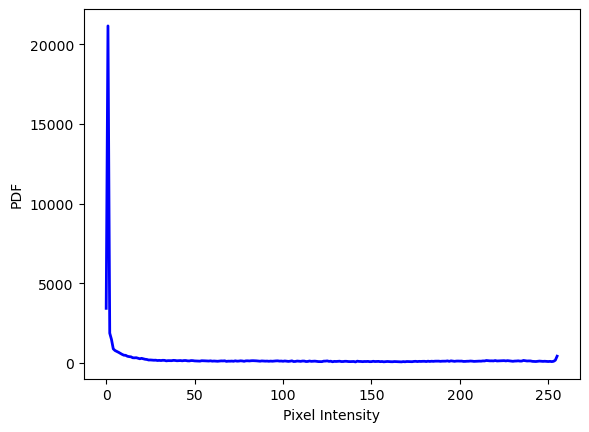

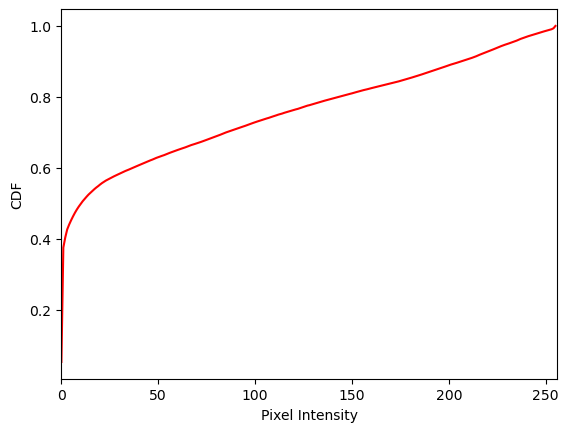

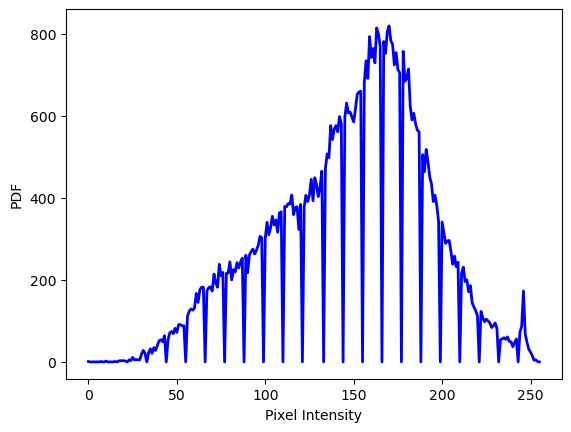

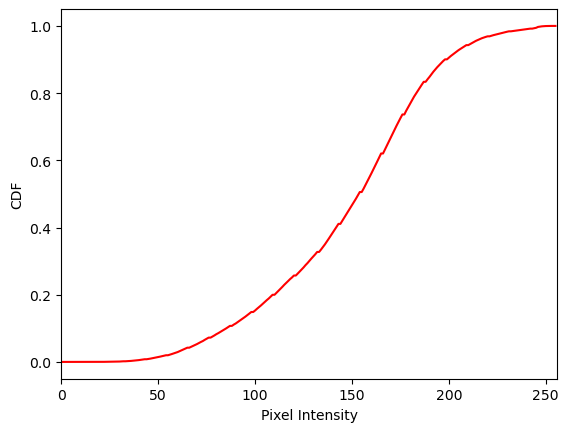

Text(0.5, 1.0, 'Changed Contrast Image')

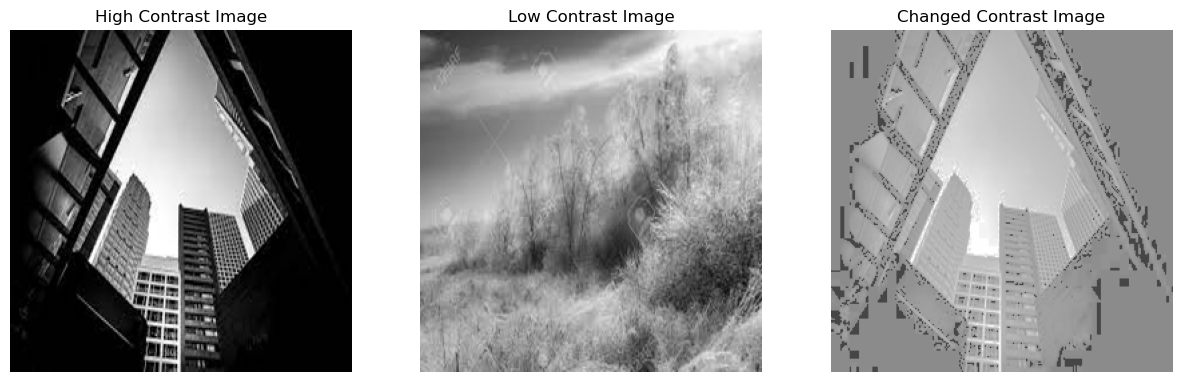

In [47]:
im_less_con = process_image(Image.open(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\building_low_cont.jpg"))
im_high_con = process_image(Image.open(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\low_contr_img.jpg"))

img_out = histogram_matching(im_less_con, im_high_con)

fig=  plt.figure(figsize = (15, 6))

fig.add_subplot(1,3,1)
plt.imshow(convert_from_nparray_to_image(im_less_con))
plt.axis("off")
plt.title("High Contrast Image")

fig.add_subplot(1,3,2)

plt.imshow(convert_from_nparray_to_image(im_high_con))
plt.axis("off")
plt.title("Low Contrast Image")

fig.add_subplot(1,3,3)

plt.imshow(convert_from_nparray_to_image(img_out))
plt.axis("off")
plt.title("Changed Contrast Image")

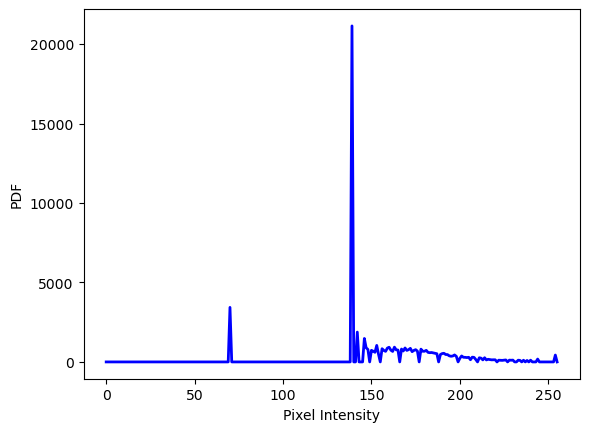

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05236816, 0.        , 0.        , 0.        , 0.     

In [48]:
create_pdf(img_out)

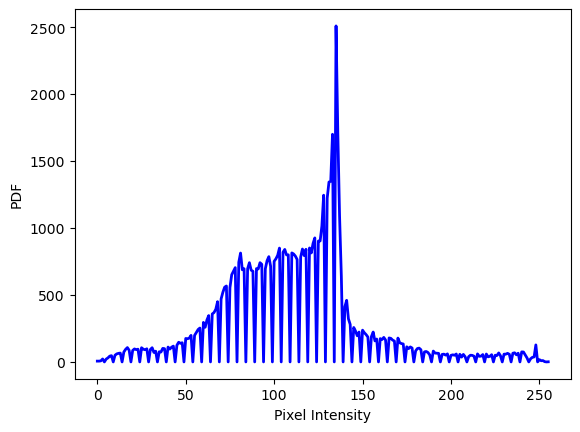

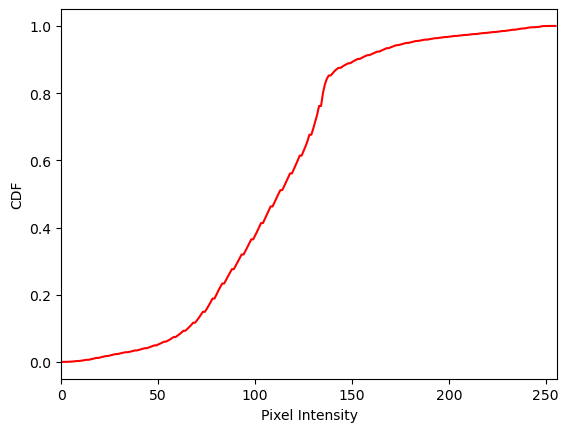

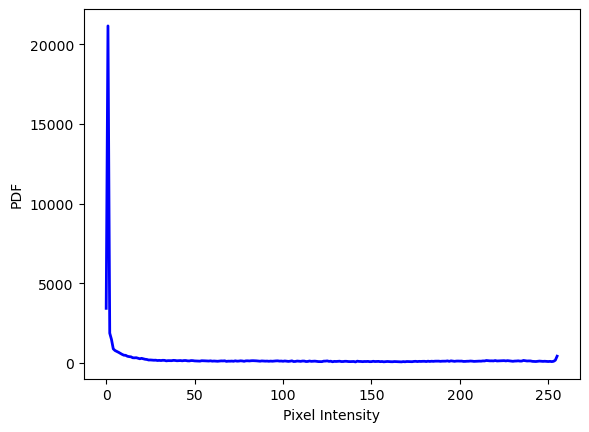

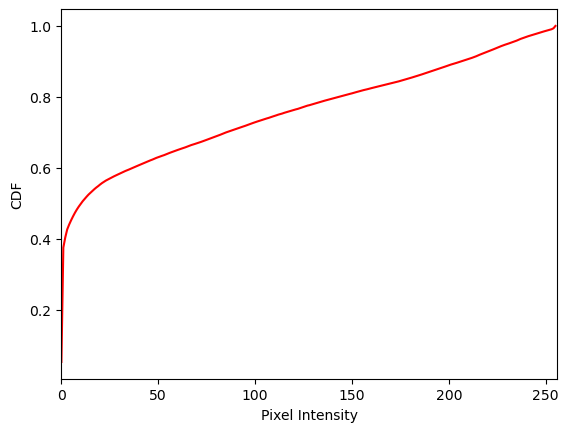

Text(0.5, 1.0, 'Changed Contrast Image')

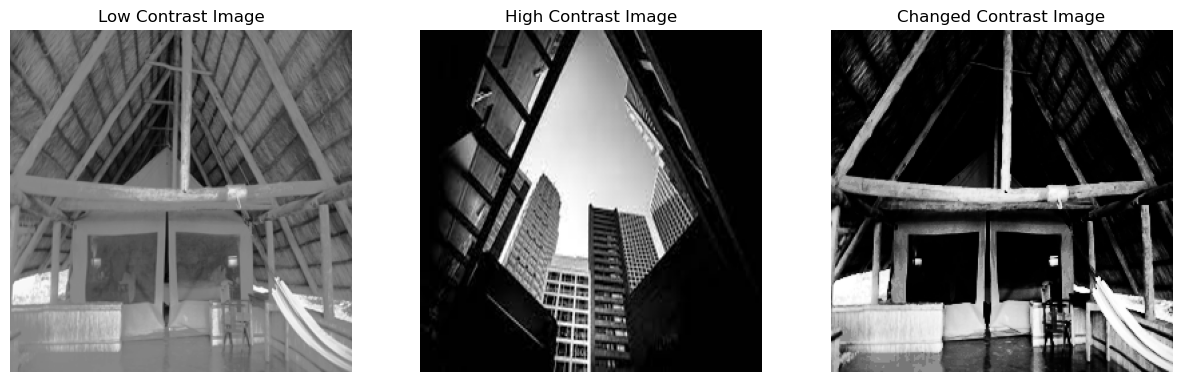

In [49]:
im_less_con = process_image(Image.open(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\DSC_0279.jpg"))
im_high_con = process_image(Image.open(r"C:\Users\rhuth\Desktop\SEMS\Sem - 2\CS - GY6643 - Computer Vision\Proj\building_low_cont.jpg"))

img_out = histogram_matching(im_less_con, im_high_con)

fig= plt.figure(figsize = (15, 6))

fig.add_subplot(1,3,1)

plt.imshow(convert_from_nparray_to_image(im_less_con))
plt.axis("off")
plt.title("Low Contrast Image")

fig.add_subplot(1,3,2)

plt.imshow(convert_from_nparray_to_image(im_high_con))
plt.axis("off")
plt.title("High Contrast Image")

fig.add_subplot(1,3,3)

plt.imshow(convert_from_nparray_to_image(img_out))
plt.axis("off")
plt.title("Changed Contrast Image")

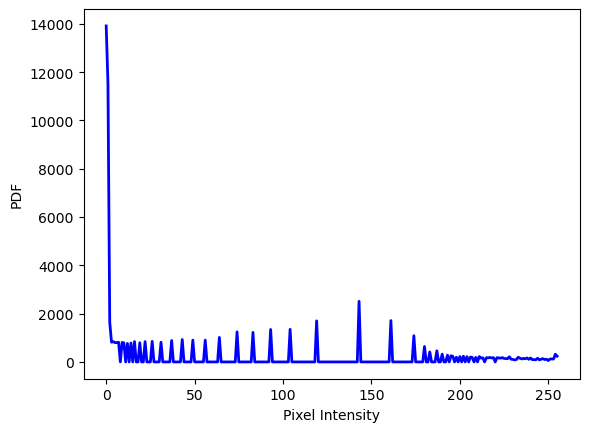

array([0.21231079, 0.17573547, 0.02511597, 0.01249695, 0.01281738,
       0.01219177, 0.01220703, 0.01242065, 0.        , 0.01229858,
       0.01205444, 0.        , 0.01167297, 0.        , 0.01194763,
       0.        , 0.01286316, 0.        , 0.        , 0.01211548,
       0.        , 0.        , 0.01283264, 0.        , 0.        ,
       0.        , 0.01298523, 0.        , 0.        , 0.        ,
       0.        , 0.01242065, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01350403, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01412964, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01377869,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01377869, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01548767,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01899

In [50]:
create_pdf(img_out)